In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sushmitha2024","key":"23200b4956e3977b99ecefa11f70fc54"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d awsaf49/brain-tumor-mri-and-ct-dataset --force


403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
!kaggle datasets download -d murtozalikhon/brain-tumor-multimodal-image-ct-and-mri --force


Dataset URL: https://www.kaggle.com/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri
License(s): CC-BY-NC-SA-4.0
 98% 354M/361M [00:08<00:00, 68.2MB/s]
100% 361M/361M [00:08<00:00, 43.4MB/s]


In [ ]:
import zipfile

zip_path = "brain-tumor-multimodal-image-ct-and-mri.zip"
extract_path = "Brain_Tumor_Dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import os
print(os.listdir("Brain_Tumor_Dataset/Dataset"))


['Brain Tumor MRI images', 'Brain Tumor CT scan Images']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path = "Brain_Tumor_Dataset/Dataset"
mri_train_path = os.path.join(dataset_path, "brain tumor MRI images", "MRI image source")
ct_train_path = os.path.join(dataset_path, "brain tumor Ct scan images", "Ct image source")


In [ ]:
import os
dataset_path = "Brain_Tumor_Dataset/Dataset"
print(os.listdir(dataset_path))


['Brain Tumor MRI images', 'Brain Tumor CT scan Images']


In [ ]:
mri_path = os.path.join(dataset_path, "Brain Tumor MRI images")
ct_path = os.path.join(dataset_path, "Brain Tumor CT scan Images")

print(os.listdir(mri_path))
print(os.listdir(ct_path))


['MRI image source.txt', 'Healthy', 'Tumor']
['Healthy', 'CT image source.txt', 'Tumor']


In [ ]:
import os
dataset_path = "Brain_Tumor_Dataset/Dataset"
mri_path = os.path.join(dataset_path, "Brain Tumor MRI images")
ct_path = os.path.join(dataset_path, "Brain Tumor CT scan Images")
print("MRI Folder:", os.listdir(mri_path))
print("CT Folder:", os.listdir(ct_path))
print("MRI Tumor Samples:", len(os.listdir(os.path.join(mri_path, "Tumor"))))
print("MRI Healthy Samples:", len(os.listdir(os.path.join(mri_path, "Healthy"))))
print("CT Tumor Samples:", len(os.listdir(os.path.join(ct_path, "Tumor"))))
print("CT Healthy Samples:", len(os.listdir(os.path.join(ct_path, "Healthy"))))


MRI Folder: ['MRI image source.txt', 'Healthy', 'Tumor']
CT Folder: ['Healthy', 'CT image source.txt', 'Tumor']
MRI Tumor Samples: 3000
MRI Healthy Samples: 2000
CT Tumor Samples: 2318
CT Healthy Samples: 2300


Original dataset class distribution: {0: 2000, 1: 3000}
Training set distribution: {0: 1600, 1: 2400}
Testing set distribution: {0: 400, 1: 600}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
SVM Accuracy: 81.00%


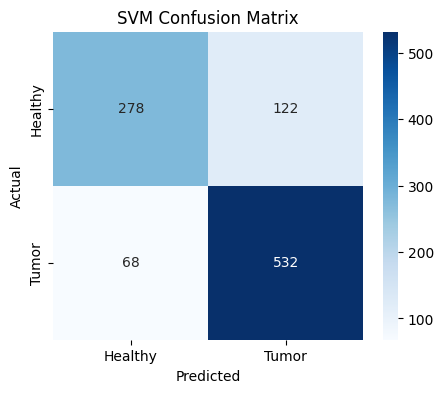

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
def load_images(folder, img_size=(64, 64)):
    images = []
    labels = []
    for label in ['Tumor', 'Healthy']:
        path = os.path.join(folder, label)
        for file in os.listdir(path):
            img = cv2.imread(os.path.join(path, file))
            img = cv2.resize(img, img_size)
            img = img / 255.0
            images.append(img)
            labels.append(1 if label == 'Tumor' else 0)
    return np.array(images), np.array(labels)
dataset_path = "Brain_Tumor_Dataset/Dataset/Brain Tumor MRI images"
X, y = load_images(dataset_path)
unique_classes, counts = np.unique(y, return_counts=True)
print("Original dataset class distribution:", dict(zip(unique_classes, counts)))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Testing set distribution:", dict(zip(*np.unique(y_test, return_counts=True))))
feature_extractor = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),  # Extracts features
    Dense(128, activation='relu')
])
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_features, y_train)
y_pred_svm = svm_model.predict(X_test_features)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Tumor"], yticklabels=["Healthy", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()
